In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<h2> Loading and concating data </h2>

In [2]:
data = []
for i in range(1,6):
    tmp_df = pd.read_csv(f'data/data{i}.csv')
    tmp_df.columns =['Artist', 'Name', 'Year', 'Popularity', 'genre', 'lyrics'] 
    data.append(tmp_df)
df = pd.concat(data,ignore_index=True, sort=True)
df.to_csv('out/total_data.csv')

In [3]:
# replace \r\n with space in Lyrics
df.lyrics = df.lyrics.str.replace('\r\n', ' ')

In [4]:
# extract gener
df.genre = df.genre.apply(lambda x: x[7:x.find('").setTar')])

In [5]:
df.genre.unique()

array(['Rock', 'Pop', 'Other', 'Country', 'RB', '', 'HipHop', 'Jazz',
       'Folk', 'Electronic', 'Indie'], dtype=object)

In [6]:
# sepaarate mising genre
df_mis_gen = df[df.genre ==""]
df = df[df.genre !=""]

In [7]:
#fixing Bob Marley's genre
bob = df_mis_gen[df_mis_gen.Artist == 'Bob Marley']
bob.genre = 'Folk'
df = pd.concat([df,bob],ignore_index=True, sort=True)

In [8]:
#fixing Zack Knight's genre
zak = df_mis_gen[df_mis_gen.Artist == 'Zack Knight']
zak.genre = 'RB'
df = pd.concat([df,zak],ignore_index=True, sort=True)

In [9]:
# saving missing genre
df_mis_gen.to_csv("out/missing_genre.csv")

In [10]:
# saving rows that contain missing values
df[df.isnull().values.any(axis=1)].to_csv('out/mising_val.csv')

In [9]:
#dropp mising value containing rows
df = df[~df.isnull().values.any(axis=1)]

In [10]:
# save dublicated rows
df[df[['Artist', 'Name' ]].duplicated()].sort_values(['Artist', 'Name' ]).to_csv('out/dublicated.csv')

In [11]:
#drop duplicates
df = df[~df[['Artist', 'Name' ]].duplicated()]

<h2> four informative visualizations </h2>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from matplotlib.pyplot import figure
%matplotlib Inline

<h2> The avarage popularity af every gener </h2>

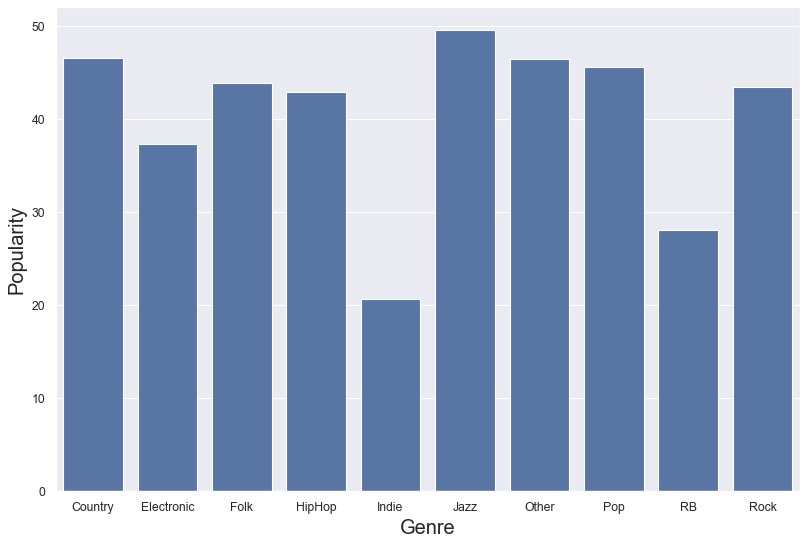

In [13]:
tmp = df[['genre','Popularity']].groupby('genre').mean()
fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x=tmp.index, y=tmp.Popularity, color='b');
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

<h3> The chart show that Indie, R&B and Electronic are the most unpopular genres oppositely Jazz which of course the most popular for all times </h3>

In [14]:
from ipywidgets import interact, widgets

<h2> Time serries that shows yearly made songs in every genre and genre popularity </h2>

In [15]:
grouped_mean = df[['Year','genre','Popularity']].groupby(['Year','genre']).mean()
grouped_count = df[['Year','genre','Popularity']].groupby(['Year','genre']).count()
def plotyear(year): 
    fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
    x = grouped_count.loc[year].Popularity
    y = grouped_mean.loc[year].Popularity
    ax = sns.scatterplot(x=x, y=y, s=250)
    plt.xlabel('Number of songs in that genre', fontsize=20)
    plt.ylabel('Avarage popularity of genre', fontsize=20)
    ax.set_ylim([0,100])
    for i in list(list(x.index)):
        ax.text(x[i],y[i],i, fontsize=35, verticalalignment='bottom')

In [16]:
interact(plotyear, year=widgets.IntSlider(min=1990, max=2018, step=1, value=2015));

interactive(children=(IntSlider(value=2015, description='year', max=2018, min=1990), Output()), _dom_classes=(…

<h2> The  time series shows that after 2000 the amount of Rock and Pop songs significantly larger than other genres, also Jazz songs tipically  announced in fewer countities but they typically are on top of popularity, another thing is that at 2015 year genre Indie is outsider becouse of low popularity and so on </h2>

In [17]:
from scipy import stats

<h2> The mean popularity of each artist</h2>

In [18]:
grouped = df[['Artist','Popularity', 'Year']].groupby(['Artist','Year']).apply(func=stats.hmean)

In [19]:
def plot_artist(artist):
    fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
    data = grouped[artist]
    ax = sns.scatterplot(x=data.index, y=data.values, s=300)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Avarage popularity of Artist', fontsize=20);
    plt.title(artist, fontsize=30)
    ax.tick_params(axis='x', labelsize=15 )
    ax.tick_params(axis='y', labelsize=15 )
    ax.set_ylim([0,100])

In [20]:
interact(plot_artist, artist=widgets.Dropdown(options=df.Artist.unique(), value='Adele',  description='Artist:'));

interactive(children=(Dropdown(description='Artist:', index=3, options=('Atif Aslam', 'ABBA', 'Arijit Singh', …

<h2> The following heatmap shows how the number of songs announced every year dramaticaly increase compering a few Folk and Rock songs in 70s to 2000s. It also shows development of each genre, for exaple accordig our data Country genre achives to it popularity in mining of new songs around 2005, RB starts to become popular since 1995  </h2> 

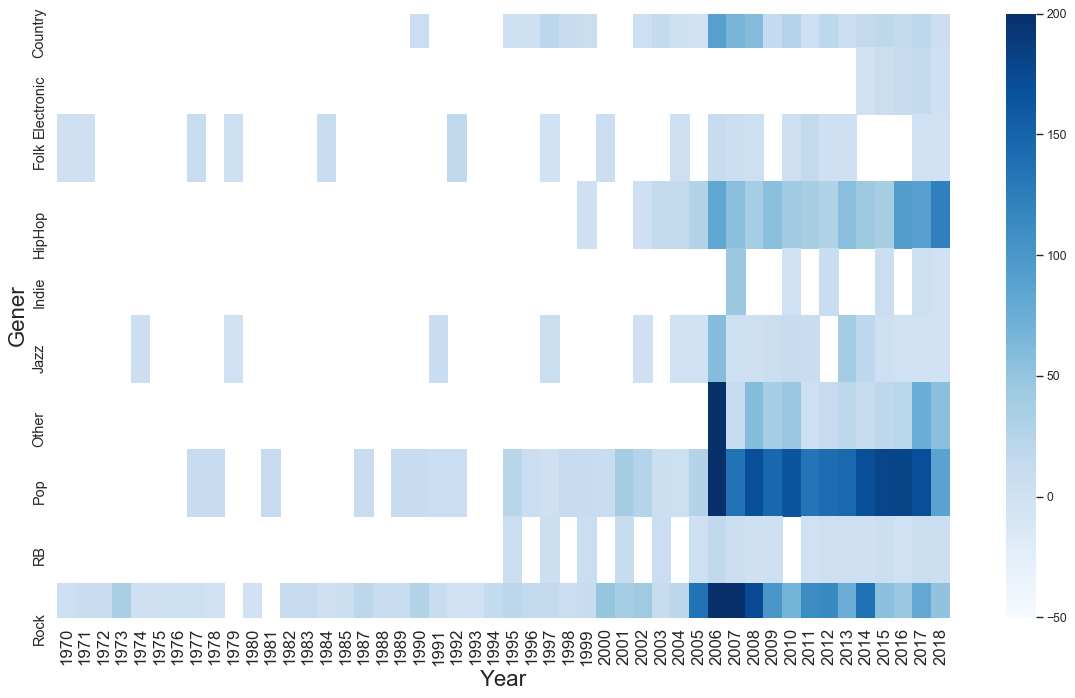

In [21]:
sns.set_style("whitegrid")
fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
df2 = grouped_count.reset_index().pivot(columns='Year',index='genre',values='Popularity')
ax = sns.heatmap(df2,cmap="Blues", vmin=-50, vmax=200);
ax.tick_params(axis='x', labelsize=15 );
ax.tick_params(axis='y', labelsize=13 );
plt.xlabel('Year', fontsize=20)
plt.ylabel('Gener', fontsize=20);

In [22]:
# removing hindi text and special signs, leaving onli latin text
df.lyrics = df.lyrics.str.replace(r'[\.,:]', " ")
df.lyrics = df.lyrics.str.replace(r'[^a-zA-Z\ ]', "")
df.lyrics = df.lyrics.str.strip()

In [23]:
# saving songs with very short lyrics, instrumental you can feel it and such kind of staff
df[df.lyrics.str.len() <= 60].to_csv('out/uncertain_lirics.csv')

In [24]:
# remov songs with very short lyrics
df = df[df.lyrics.str.len() > 60]

In [25]:
#ABBA	Hamlet III Lyrics story beside of lirics
ind = df[df.Artist == 'ABBA'][df.Name =='Hamlet III Lyrics'].index
df.drop(ind, inplace=True)

In [29]:
df.to_csv('out/clean_data.csv')

<h1> sentiment and polarity of each song </h1>

In [2]:
import numpy as np
import utils
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

<h3> I found dataset with lyrics and mood of song , so I can make classifier based on lirics
 Downside the songs are different and  only  in english </h2>

In [3]:
df = pd.read_csv('out/clean_data.csv')

In [4]:
new_df1 = pd.read_csv('new_data/Train.csv')
new_df2 = pd.read_csv('new_data/Test.csv')

new_df = pd.concat([new_df1,new_df2],ignore_index=True, sort=True)

In [6]:
vectorizer = utils.Vectorizer()
X = vectorizer.fit_transform(new_df.lyrics)
X.shape

(778, 6561)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, new_df.Mood, test_size=0.1, random_state=42)

In [8]:
params = {'alpha' : np.arange(0,1,0.2)}
nb = MultinomialNB()
clf = GridSearchCV(estimator=nb, param_grid=params, n_jobs=-1)

In [9]:
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0. , 0.2, 0.4, 0.6, 0.8])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
clf.score(X_test, y_test)

0.44871794871794873

In [10]:
X = vectorizer.transform(df.lyrics)

In [13]:
df['Mood'] = clf.predict(X)

In [14]:
df

,Unnamed: 0,Artist,Name,Popularity,Year,genre,lyrics,Mood
0,0,Atif Aslam,Paniyon Sa Lyrics,100.000000,2018,Rock,Jo tere laagi preet mohe Rooh baar baar tera n...,happy
1,1,Atif Aslam,"O Saathi (From ""Baaghi 2"") Lyrics",92.662551,2018,Rock,Kacchi doriyon doriyon doriyon se Mainu tu b...,happy
2,2,Atif Aslam,Dil Diyan Gallan Lyrics,91.854784,2017,Rock,Hmm Woo Allah mujhe dard ke kaabil bana ...,happy
3,3,Atif Aslam,Jab Koi Baat Lyrics,88.245526,2018,Rock,Edited by hadiehama hmmhm hmmhm hmmhm hmmm ...,happy
4,4,Atif Aslam,Jeena Jeena Lyrics,87.891493,2015,Rock,Jab koi baat bigad jaaye Jab koi mushkil pad j...,happy
...,...,...,...,...,...,...,...,...
7102,7701,Zack Knight,Ya Baba (Club Remix) Lyrics,13.470094,2018,RB,Pull up to the spot and let me see whats under...,happy
7103,7702,Zack Knight,Diggy Bom Lyrics,8.498683,2017,RB,Boy you dont have to be the last one standing ...,happy
7104,7703,Zack Knight,Shot Of Me Lyrics,8.498683,2013,RB,cellStep to the mark girl wait in line Im like...,angry
7105,7704,Zack Knight,Poison In My Sleep Lyrics,6.000000,2013,RB,Your poison Everything you touch is poison Eve...,angry


In [15]:
df.to_csv('out/data_with_mood.csv')

<h2> predict music genre by its lyrics </h2>

<h3> Define NN  </h3>

In [3]:
gen_df = pd.read_csv('out/clean_data.csv')

In [4]:
import utils
import tensorflow.keras as keras
from tensorflow.keras import Sequential, layers, Input, optimizers, losses, metrics, callbacks, models

In [5]:
from sklearn.preprocessing import StandardScaler 

In [7]:
vectorizer = utils.Vectorizer()
X = vectorizer.fit_transform(gen_df.lyrics)

In [8]:
X.shape

(7107, 41989)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, gen_df.genre, test_size=0.15, random_state=42)

In [29]:
genres = pd.get_dummies(y_test).columns.to_list()
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()

In [30]:
# TODO install tensorflow sparse to use sparse tensors
#X_test = X_test.toarray()[:, :, np.newaxis]
X_train = X_train.toarray()[:, :, np.newaxis]

In [31]:
genres 

['Country',
 'Electronic',
 'Folk',
 'HipHop',
 'Indie',
 'Jazz',
 'Other',
 'Pop',
 'RB',
 'Rock']

In [32]:
model = Sequential(layers=None, name=None)

#feature extraction
model.add(layers.Conv1D(1,10, input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(pool_size=5))
          
model.add(layers.Conv1D(1,10))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(pool_size=5))   

model.add(layers.Conv1D(1,10))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(pool_size=4))


#clasification
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(units=10))
model.add(layers.Softmax())

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 41980, 1)          11        
_________________________________________________________________
batch_normalization_11 (Batc (None, 41980, 1)          4         
_________________________________________________________________
re_lu_11 (ReLU)              (None, 41980, 1)          0         
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 8396, 1)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 8387, 1)           11        
_________________________________________________________________
batch_normalization_12 (Batc (None, 8387, 1)           4         
_________________________________________________________________
re_lu_12 (ReLU)              (None, 8387, 1)          

In [34]:
model.compile(
    optimizer=optimizers.Nadam(),  
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalCrossentropy(), metrics.CategoricalAccuracy()],
)

In [35]:
m_save = callbacks.ModelCheckpoint('model.hdf5', save_best_only=True,save_weights_only=False,
                                   verbose=1, monitor='val_loss', mode='min')

In [36]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=80, verbose=2, 
                    validation_split=0.2, shuffle=True, callbacks=[m_save])

Train on 4832 samples, validate on 1208 samples
Epoch 1/80

Epoch 00001: val_loss improved from inf to 2.28400, saving model to model.hdf5
4832/4832 - 45s - loss: 2.7089 - categorical_crossentropy: 2.7089 - categorical_accuracy: 0.2423 - val_loss: 2.2840 - val_categorical_crossentropy: 2.2840 - val_categorical_accuracy: 0.3353
Epoch 2/80

Epoch 00002: val_loss improved from 2.28400 to 2.27142, saving model to model.hdf5
4832/4832 - 43s - loss: 2.0287 - categorical_crossentropy: 2.0287 - categorical_accuracy: 0.3216 - val_loss: 2.2714 - val_categorical_crossentropy: 2.2714 - val_categorical_accuracy: 0.3560
Epoch 3/80

Epoch 00003: val_loss improved from 2.27142 to 2.20225, saving model to model.hdf5
4832/4832 - 43s - loss: 1.7328 - categorical_crossentropy: 1.7328 - categorical_accuracy: 0.3779 - val_loss: 2.2022 - val_categorical_crossentropy: 2.2022 - val_categorical_accuracy: 0.3659
Epoch 4/80

Epoch 00004: val_loss improved from 2.20225 to 2.08038, saving model to model.hdf5
4832/4

Epoch 31/80

Epoch 00031: val_loss did not improve from 1.31850
4832/4832 - 43s - loss: 1.1384 - categorical_crossentropy: 1.1384 - categorical_accuracy: 0.5451 - val_loss: 1.3371 - val_categorical_crossentropy: 1.3371 - val_categorical_accuracy: 0.5050
Epoch 32/80

Epoch 00032: val_loss did not improve from 1.31850
4832/4832 - 44s - loss: 1.1410 - categorical_crossentropy: 1.1410 - categorical_accuracy: 0.5519 - val_loss: 1.3293 - val_categorical_crossentropy: 1.3293 - val_categorical_accuracy: 0.5000
Epoch 33/80

Epoch 00033: val_loss did not improve from 1.31850
4832/4832 - 44s - loss: 1.1209 - categorical_crossentropy: 1.1209 - categorical_accuracy: 0.5468 - val_loss: 1.3313 - val_categorical_crossentropy: 1.3313 - val_categorical_accuracy: 0.5033
Epoch 34/80

Epoch 00034: val_loss did not improve from 1.31850
4832/4832 - 44s - loss: 1.1376 - categorical_crossentropy: 1.1376 - categorical_accuracy: 0.5470 - val_loss: 1.3352 - val_categorical_crossentropy: 1.3352 - val_categorical_a

Epoch 64/80

Epoch 00064: val_loss did not improve from 1.31850
4832/4832 - 44s - loss: 1.0783 - categorical_crossentropy: 1.0783 - categorical_accuracy: 0.5548 - val_loss: 1.3436 - val_categorical_crossentropy: 1.3436 - val_categorical_accuracy: 0.5050
Epoch 65/80

Epoch 00065: val_loss did not improve from 1.31850
4832/4832 - 43s - loss: 1.0800 - categorical_crossentropy: 1.0800 - categorical_accuracy: 0.5695 - val_loss: 1.3491 - val_categorical_crossentropy: 1.3491 - val_categorical_accuracy: 0.5124
Epoch 66/80

Epoch 00066: val_loss did not improve from 1.31850
4832/4832 - 44s - loss: 1.0832 - categorical_crossentropy: 1.0832 - categorical_accuracy: 0.5575 - val_loss: 1.3420 - val_categorical_crossentropy: 1.3420 - val_categorical_accuracy: 0.5124
Epoch 67/80

Epoch 00067: val_loss did not improve from 1.31850
4832/4832 - 43s - loss: 1.0788 - categorical_crossentropy: 1.0788 - categorical_accuracy: 0.5677 - val_loss: 1.3409 - val_categorical_crossentropy: 1.3409 - val_categorical_a

In [37]:
from joblib import dump, load

In [38]:
dump(vectorizer,'vectorizer.joblib')

['vectorizer.joblib']

In [39]:
dump(history.history, 'train_history_dict.joblib')

['train_history_dict.joblib']

In [40]:
X_test = X_test.toarray()[:, :, np.newaxis]

In [41]:
history.history.keys()

dict_keys(['loss', 'categorical_crossentropy', 'categorical_accuracy', 'val_loss', 'val_categorical_crossentropy', 'val_categorical_accuracy'])

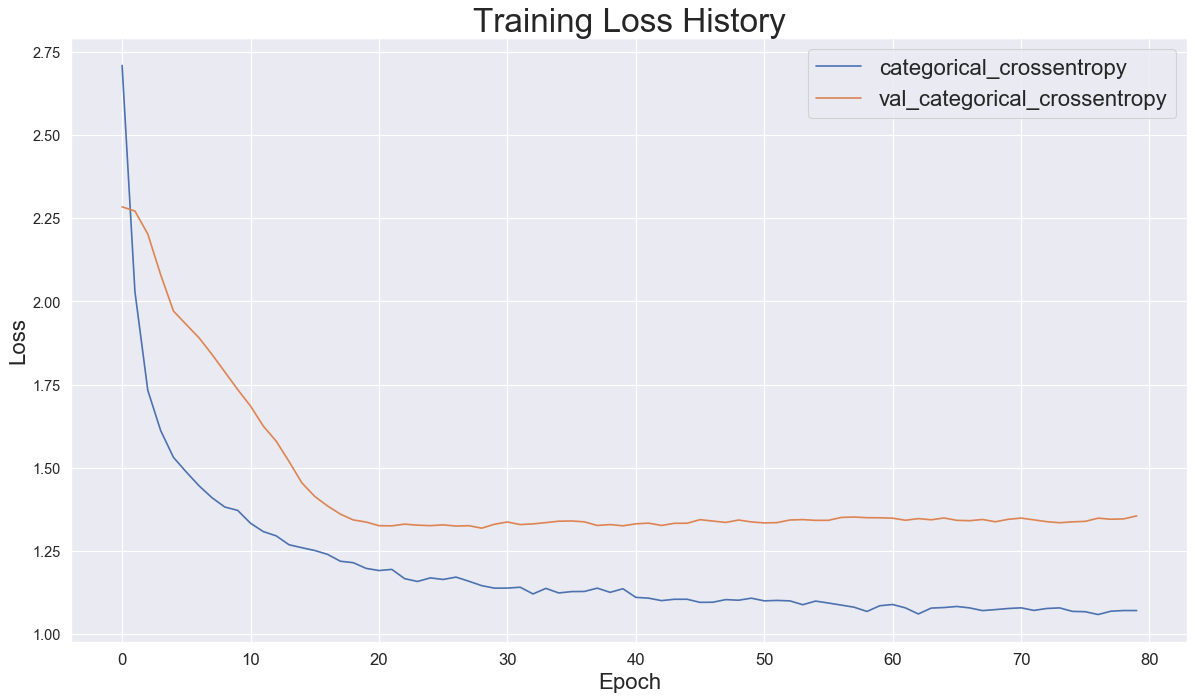

In [42]:
fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');

categorical_crossentropy = history.history['categorical_crossentropy']
sns.lineplot(range(0, len(categorical_crossentropy)), categorical_crossentropy  );

val_categorical_crossentropy = history.history['val_categorical_crossentropy']
sns.lineplot(range(0, len(val_categorical_crossentropy)), val_categorical_crossentropy );

plt.legend(["categorical_crossentropy","val_categorical_crossentropy"], fontsize=20)
plt.tick_params(axis='x', labelsize=15 );
plt.tick_params(axis='y', labelsize=13 );
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20);
plt.title('Training Loss History', fontsize=30);

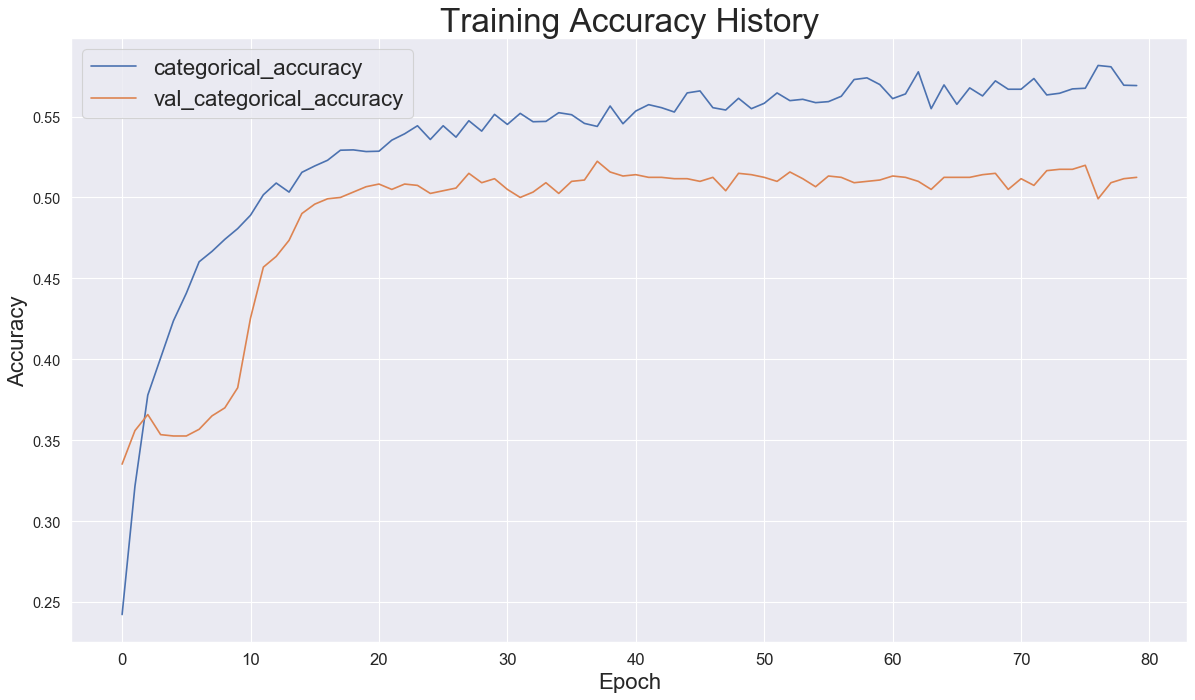

In [43]:
fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');

categorical_accuracy = history.history['categorical_accuracy']
sns.lineplot(range(0, len(categorical_accuracy)), categorical_accuracy  );

val_categorical_accuracy = history.history['val_categorical_accuracy']
sns.lineplot(range(0, len(val_categorical_accuracy)), val_categorical_accuracy );

plt.legend(["categorical_accuracy","val_categorical_accuracy"], fontsize=20)
plt.tick_params(axis='x', labelsize=15 );
plt.tick_params(axis='y', labelsize=13 );
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20);
plt.title('Training Accuracy History', fontsize=30);

<h2> The checkpoint last saves model at epoche 29 which according to this diagrams pretty good point to save because after that model starts to overfit </h2>

<h2> Testing genre prediction function </h2>

In [44]:
from tensorflow.keras import  models

In [45]:
loaded_model = models.load_model('model.hdf5')

In [46]:
_,loss, acc = loaded_model.evaluate(X_test, y_test,
                            batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', acc)

1067/1067 [==============================] - 3s 3ms/sample - loss: 1.3525 - categorical_crossentropy: 1.3525 - categorical_accuracy: 0.4967
Test loss: 1.3525054
Test accuracy: 0.49671978


In [47]:
import Predict_genre_by_lyrics as p

In [48]:
# gotthard let it rain lyrics
lyrics = ["""Lady Jane
Would we ever meet again
The times we had are gonna day by day
All the pain
That we gave each other pays
Not enough to gonna make us wrong
Would it sell this love will lest forever
Standing out the crossroad once again alot of things in love will growing
Slowly in progress
I know - you've got to listen to the phone
Let it rain let it rain
Till the sun comes back again
The answer is your only friend
We walk this way
Slowly step by step
We don't have to bother just believe
There's a place deep inside
Were we've never been before
I know we can be there you and me
Would it sell this love will lest forever
Now were standing at the crossroad once again
All the things in love will pay there
Slowly in progress
I know - you've got to listen to the phone
Let it rain let it rain
Till the sun comes back again
The answer is your only friend
Let it rain let it rain
'Cause I know we'll be there again
Freedom will be there in the end
Hope you'll find your paradise
Wish you all the best of times
The faith in love and please don't cry.
So let it rain let it rain
Till the sun comes back again
The answer is your only friend
Let it rain let it rain
'Cause I know we'll meet again
Freedom will be there in the end
Let it rain let it rain
Till the sun comes back again
The answer is your only friend
So let it rain let it rain
Yes I know we'll meet again
We will be there until the end
'Til the end"""]

In [49]:
p.predict_gener(lyrics)

'Rock'

<h2> Youtube mood function test </h2>

In [69]:
# you can run it standalone as cmd app
import youtube

In [70]:
youtube.youtube_search('Crazy song')

('Patsy Cline - Crazy (1961)', 'https://www.youtube.com/watch?v=MbnrdCS57d0')